# Intro sur seaborn

- C'est une surcouche à Matplotlib adaptée aux DataFrame et qui fait tout, même la vaisselle. 
- Très utile pour réaliser, avec du code très léger, des figures classiques de stats (genre boxplot)
- Pour toutes les figures, la syntaxe est censée être quasiment la même : (data = mon_dataframe, x = 'ma_variable_en_x', y = 'ma_variable_en_y')
- https://seaborn.pydata.org/index.html

In [44]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set(style="whitegrid", palette="muted")

In [45]:
# Load the example tips dataset
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## Boxplot : Le grand classique des stats

<Axes: xlabel='day', ylabel='total_bill'>

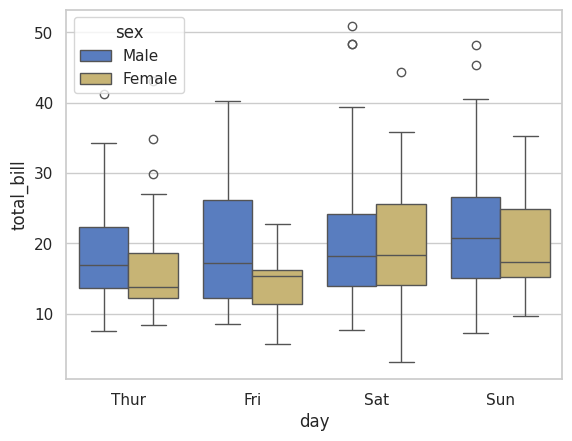

In [46]:
# Draw a nested boxplot
sns.boxplot(data=tips, x="day", y="total_bill", hue="sex", palette={"Male": "b", "Female": "y"})

## Violinplot : Un peu moins classique mais cool

<Axes: xlabel='day', ylabel='total_bill'>

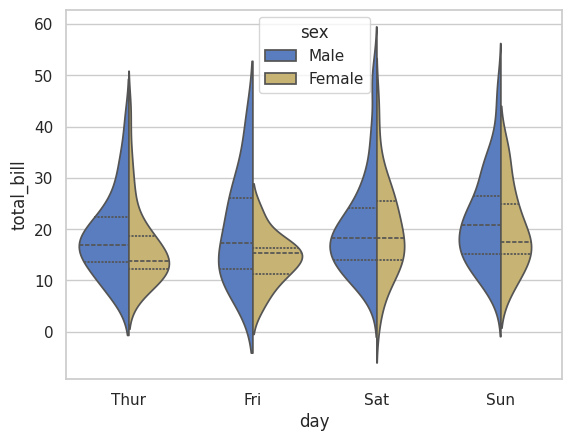

In [47]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=tips, x="day", y="total_bill", hue="sex", split=True, inner="quart", palette={"Male": "b", "Female": "y"})

## Les deux dans une seule figure : contrôler son ax

<Axes: xlabel='day', ylabel='total_bill'>

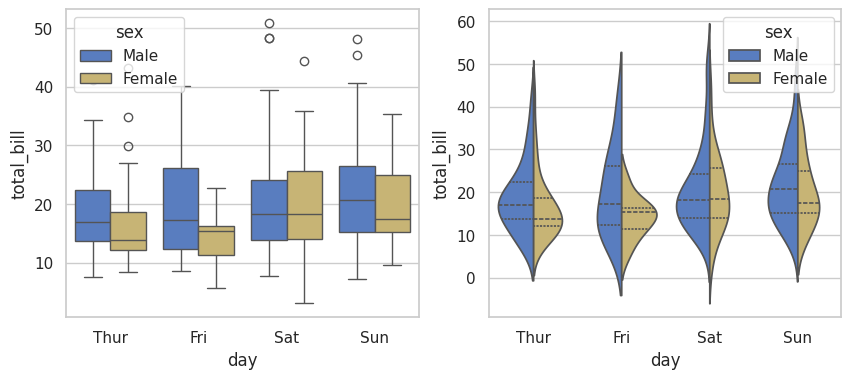

In [54]:
ncols = 2

fig, axs = plt.subplots(ncols = ncols, figsize = (ncols * 5, 4))

ax = axs[0]
sns.boxplot(data=tips, x="day", y="total_bill", hue="sex", palette={"Male": "b", "Female": "y"}, ax=ax)

ax = axs[1]
sns.violinplot(data=tips, x="day", y="total_bill", hue="sex", split=True, inner="quart", palette={"Male": "b", "Female": "y"}, ax=ax)


## Pairplot : Explorer des distributions conjointes sur de plusieurs variables

In [48]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


![Image](./img/iris.jpeg)

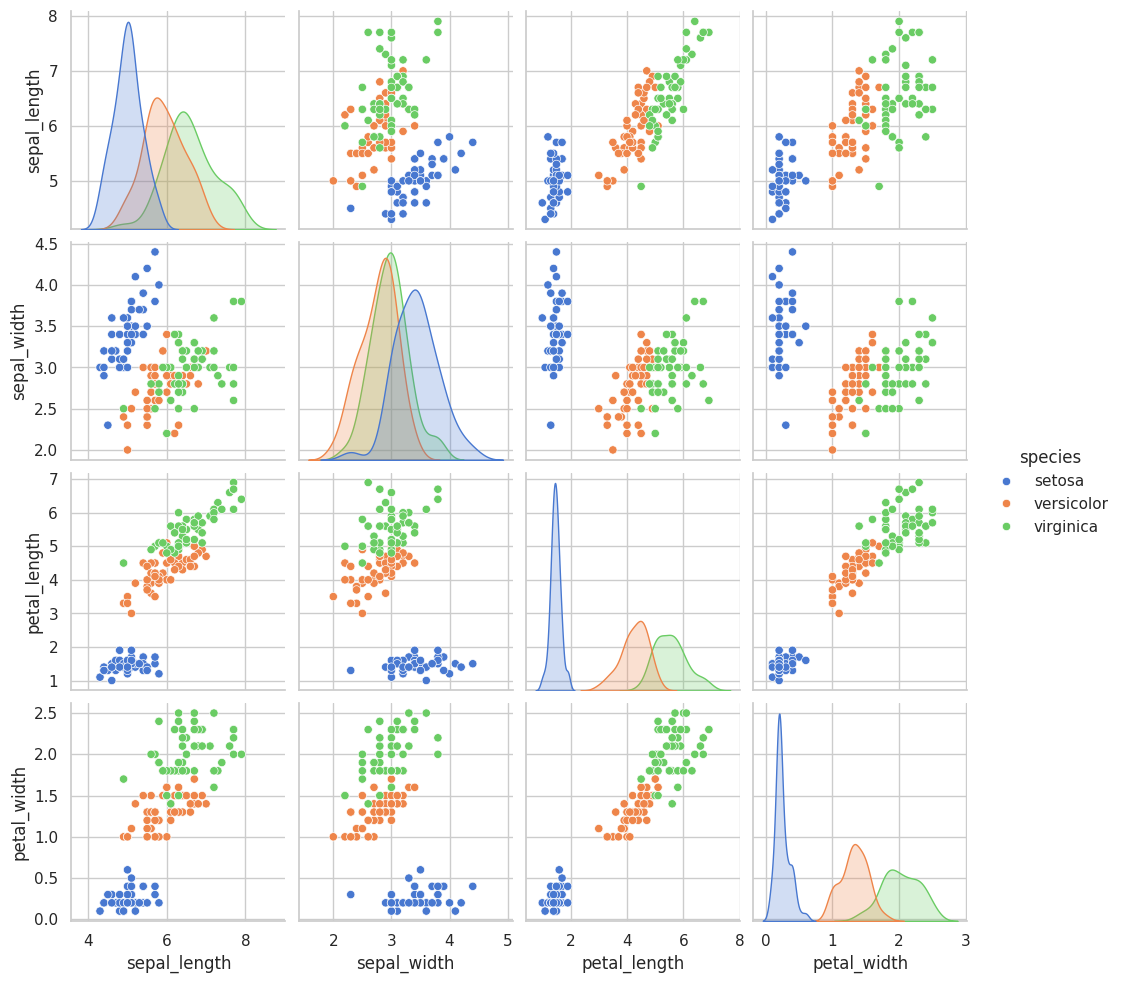

In [49]:
sns.pairplot(iris, hue="species")

# Exercice 1

Sur le dataset du titanic  /data/dataset_titanic.xlsx

 * Avec la fonction sns.pairplot étudiez les variables "Fare","Age","Pclass"
 * Utilisez "survived" pour la couleur 
 

# Solution 1

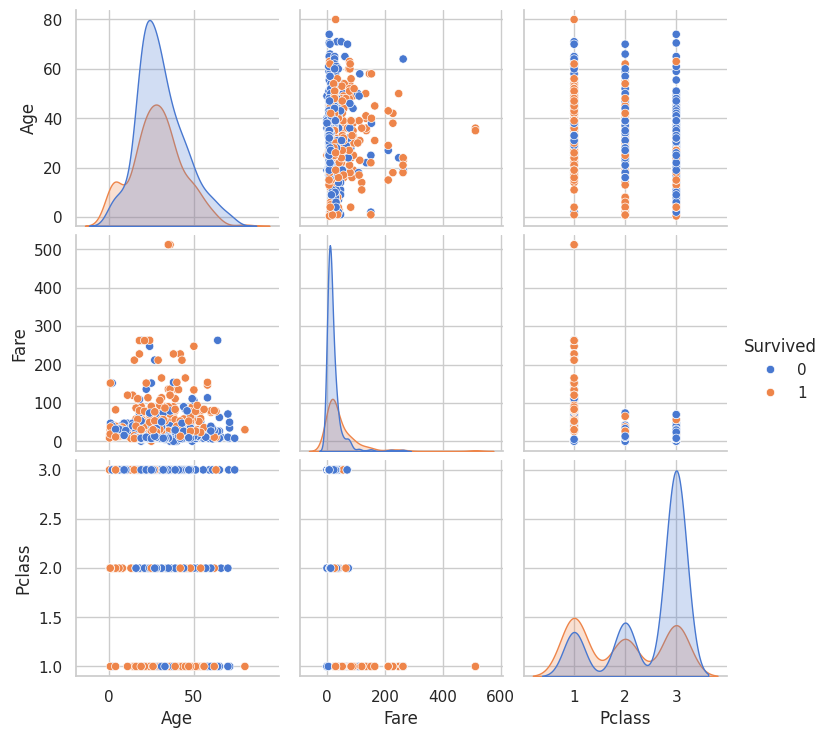

In [13]:
passenger = pd.read_excel('./data/dataset_titanic.xlsx')
passenger.head()
data = passenger[["Fare","Age","Pclass", "Survived"]].copy()
sns.pairplot(data=data, vars=['Age', 'Fare', 'Pclass'], hue="Survived", dropna=True)

# Exercie 2

 * Avec sns.violinplot : étudiez le prix du billet en fonction du genre et de la classe.

# Solution 2

<Axes: xlabel='Pclass', ylabel='Fare'>

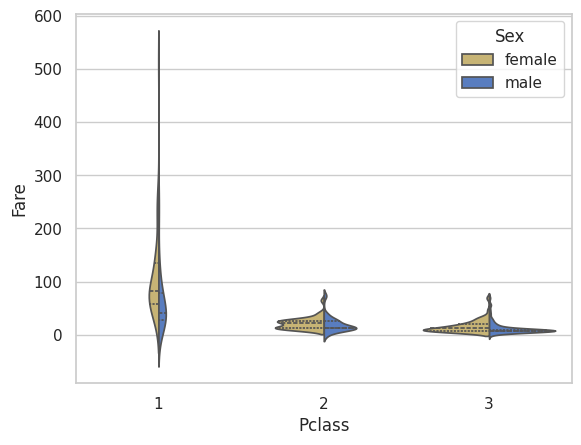

In [16]:
sns.violinplot(x="Pclass", y="Fare",
            hue="Sex", data=passenger, split=True, inner = 'quart',
            palette={"male": "b", "female": "y"})

# Exercice 3

 * Avec la fonction swarmplot, trouver une represention qui pète la classe pour mettre en valeur les variables "Embarked","Age", "Pclass"

# Solution 3

<Axes: xlabel='Pclass', ylabel='Age'>

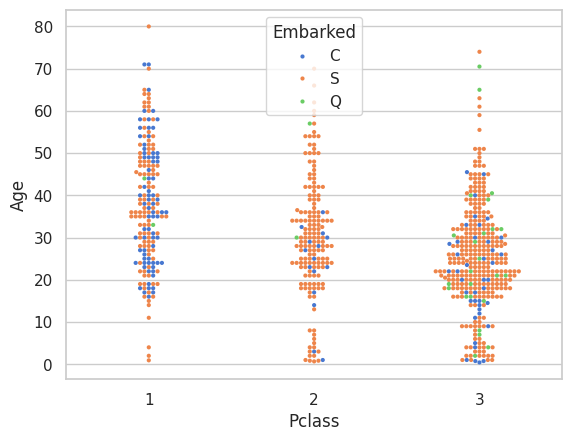

In [17]:
sns.swarmplot(x="Pclass", y="Age", hue="Embarked", data=passenger, size=3)

# Intro sur Pingouin

- https://pingouin-stats.org/build/html/index.html
- Un outil pour faire des statistiques inférentielles de base (anova ... ttest ... etc ...)
- Développé par un ancien du labo : Raphaël Vallat
- Adapté aux DataFrame (pandas) et donc cool pour être utilisé en parallèle de seaborn
- Dans le même esprit que seaborn, la syntaxe est censée être redondante : (data = mon_dataframe, within/between = 'ma_variable_explicative', dv = 'ma_variable_dépendante')

In [43]:
import pingouin as pg

## Exemple titanic 1 : Effet de la la classe sur le Tarif ...

,Source,ddof1,ddof2,F,p-unc,np2
0,Pclass,2,888,242.344157,1.031376e-84,0.353094


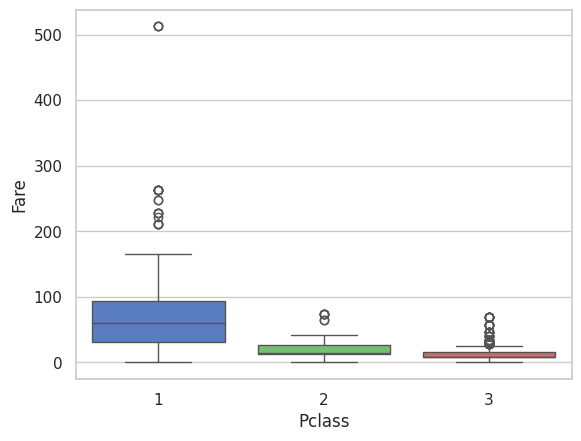

In [55]:
predictor = 'Pclass'
outcome = 'Fare'

sns.boxplot(data = passenger, x = predictor, y = outcome, hue = predictor, palette = {1:'b', 2 : 'g', 3:'r'}, legend = False)
pg.anova(data = passenger, dv = outcome, between = predictor)

### Mais les données ne semblent pas homoscédastiques ... vérifions le ...

In [56]:
pg.homoscedasticity(data = passenger, dv = outcome, group = predictor)

,W,pval,equal_var
levene,118.5702,2.288619e-46,False


### On part donc sur un test non-paramétrique genre Kruskal-Wallis ?

In [57]:
pg.kruskal(data = passenger, dv = outcome, between = predictor)

,Source,ddof1,H,p-unc
Kruskal,Pclass,2,438.043703,7.586097e-96


### Le résultat est un dataframe que l'on peut utiliser

In [70]:
res_df = pg.kruskal(data = passenger, dv = outcome, between = predictor)
res_df

,Source,ddof1,H,p-unc
Kruskal,Pclass,2,438.043703,7.586097e-96


Ma p-value est inférieure à mon seuil alpha donc je rejette l'hypothèse nulle donc c'est cool !


Text(0.5, 1.0, 'Kruskal - p-value : 7.586096900646798e-96')

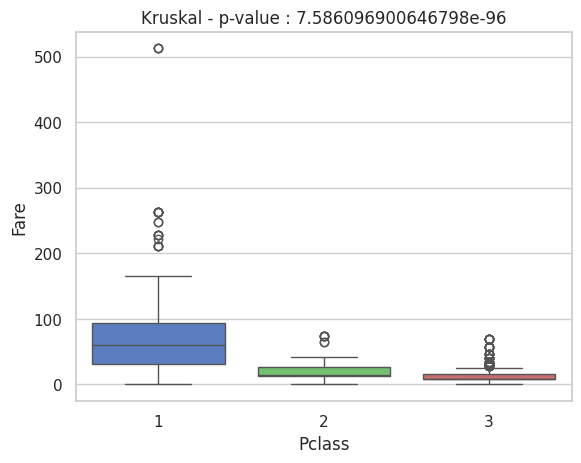

In [78]:
pvalue = res_df.loc['Kruskal','p-unc']
mon_seuil_alpha = 0.05

if pvalue < mon_seuil_alpha : 
    print("Ma p-value est inférieure à mon seuil alpha donc je rejette l'hypothèse nulle donc c'est cool !")
else:
    print("Ma p-value est supérieure à mon seuil alpha donc je ne peux pas rejeter l'hypothèse nulle ... dommage !")

fig, ax = plt.subplots()
sns.boxplot(data = passenger, x = predictor, y = outcome, hue = predictor, palette = {1:'b', 2 : 'g', 3:'r'}, legend = False,ax=ax)
ax.set_title(f'{res_df.index[0]} - p-value : {pvalue}')

## Exemple titanic 2 : Effet du genre sur le Tarif ...

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.077499,504.964301,two-sided,5.388057e-07,"[-26.29, -11.62]",0.387743,2.11e+04,0.999817


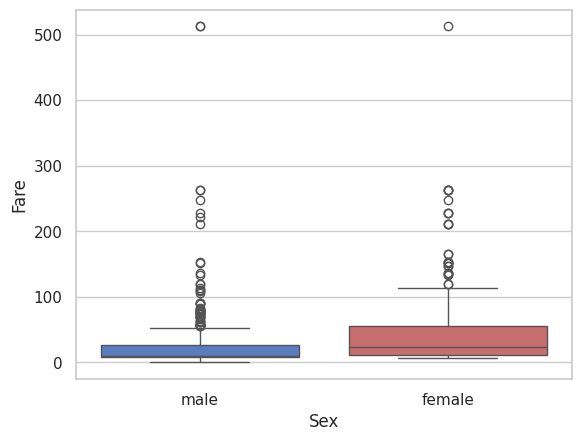

In [79]:
male_fare = passenger[passenger['Sex'] == 'male']['Fare']
female_fare = passenger[passenger['Sex'] == 'female']['Fare']

sns.boxplot(data = passenger, x = 'Sex', y = 'Fare', hue = 'Sex', palette = {'male':'b','female':'r'}, legend = False)

pg.ttest(male_fare, female_fare)

## Exemple titanic 3 : Interaction genre * Pclass sur le tarif ?

,Source,SS,DF,MS,F,p-unc,np2
0,Pclass,7.347122e+05,2.0,367356.112244,242.620968,9.763645e-85,0.354129
1,Sex,3.174857e+04,1.0,31748.565217,20.968394,5.337586e-06,0.023145
2,Pclass * Sex,5.002816e+04,2.0,25014.078906,16.520591,9.034206e-08,0.035991
3,Residual,1.339992e+06,885.0,1514.115269,NaN,NaN,NaN


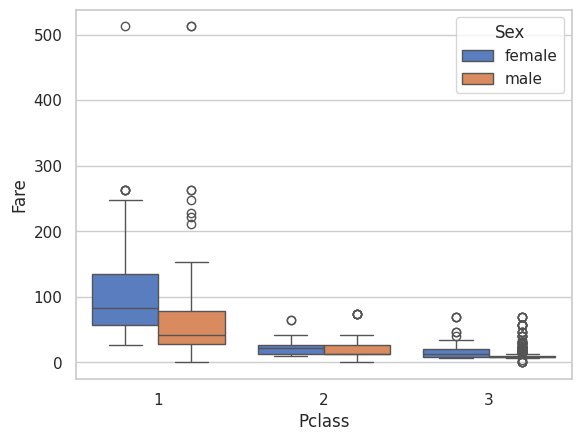

In [80]:
predictors = ['Pclass','Sex']
outcome = 'Fare'

sns.boxplot(data = passenger, x = predictors[0], y = outcome, hue = predictors[1])
pg.anova(data = passenger, dv = outcome, between = predictors)